In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [88]:
df = pd.read_csv('boston.csv')

In [89]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [90]:
df.shape

(506, 14)

In [91]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [92]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='MEDV', ylabel='Count'>

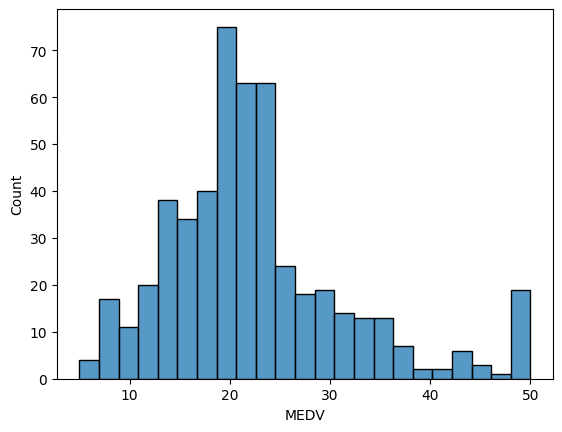

In [93]:
sns.histplot(df['MEDV'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [95]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='ZN', ylabel='Count'>

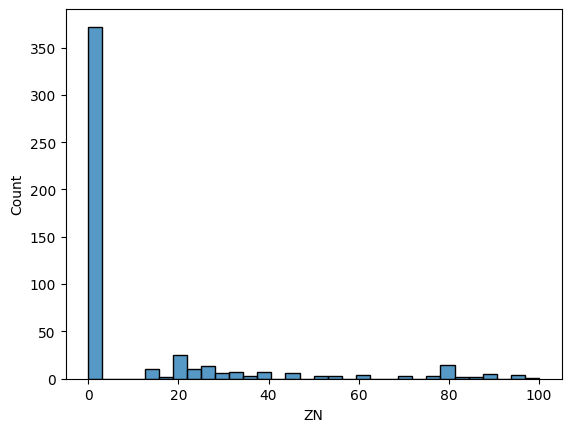

In [96]:
sns.histplot(df['ZN'])

<Axes: >

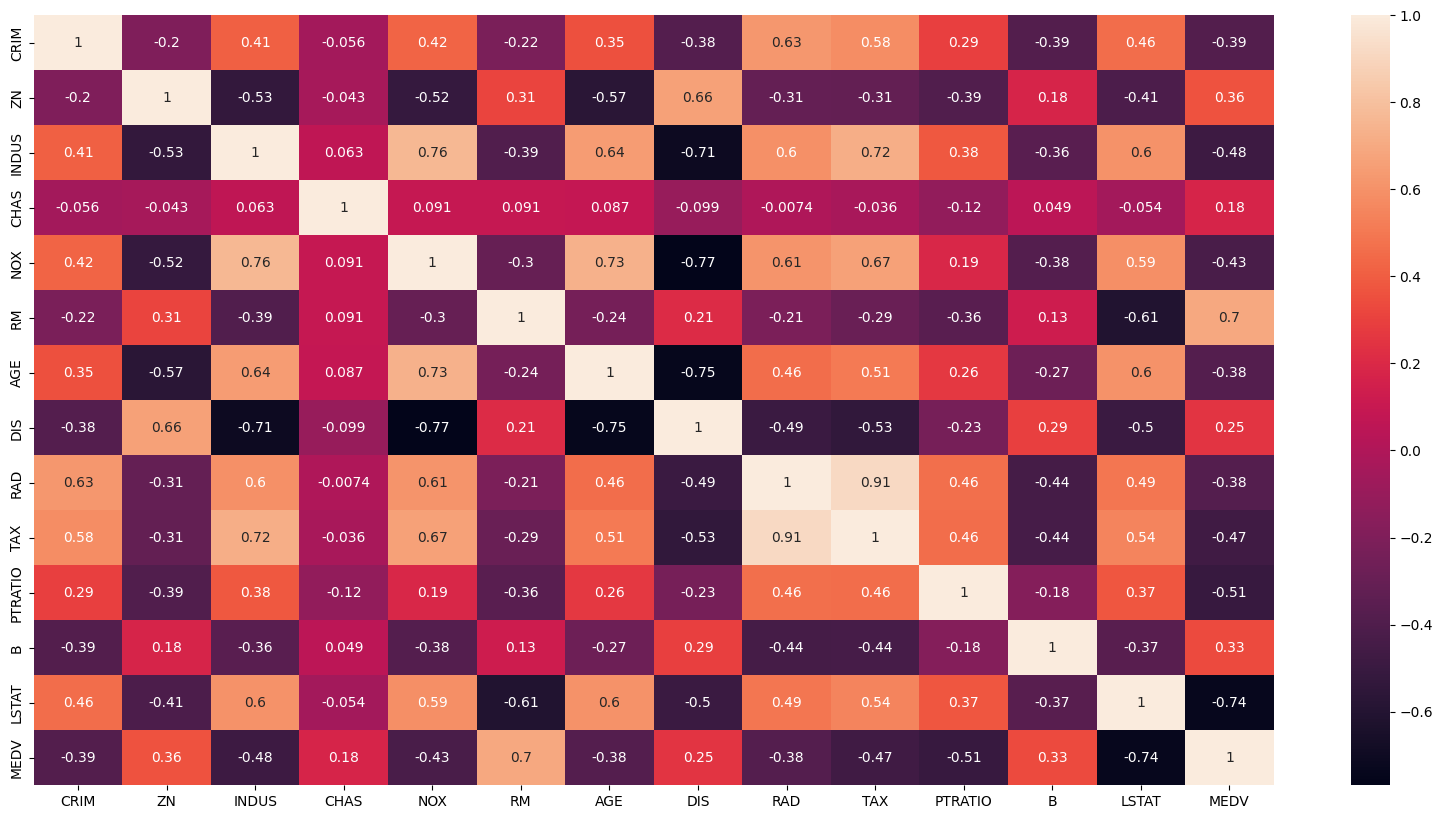

In [97]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [98]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']

In [99]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import xgboost as xgb

In [100]:
xgb = xgb.XGBRegressor()

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [103]:
y_pred_1 = xgb.predict(X_test)

In [104]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Calculate R2 score
r2 = r2_score(y_test, y_pred_1)
print(f"R2 Score: {r2}")

R2 Score: 0.9057837838492537


In [105]:
n = X_test.shape[0]
p = X_test.shape[1]
adjust_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {adjust_r2}")

Adjusted R2 Score: 0.8918654791906208


In [106]:
mean_absolute_error(y_test,y_pred_1)

1.8908873698290656

In [107]:
mean_squared_error(y_test,y_pred_1)

6.909231565384943

In [108]:
scaler = StandardScaler()

In [109]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [123]:
y_pred_2 = xgb.predict(X_test_scaled)

In [126]:
r2 = r2_score(y_test,y_pred_2)
r2

0.9057837838492537

In [127]:
n = X_test.shape[0]
p = X_test.shape[1]
adjust_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {adjust_r2}")

Adjusted R2 Score: 0.8918654791906208


<Axes: xlabel='MEDV'>

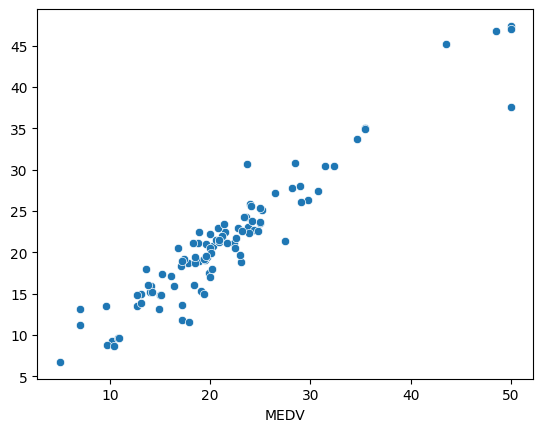

In [128]:
sns.scatterplot(x=y_test,y=y_pred_2)

In [129]:
y_pred_train = xgb.predict(X_train_scaled)

In [130]:
r2 = r2_score(y_train,y_pred_train)

In [131]:
n = X_test.shape[0]
p = X_test.shape[1]
adjust_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {adjust_r2}")

Adjusted R2 Score: 0.9999965373050925


<Axes: xlabel='MEDV'>

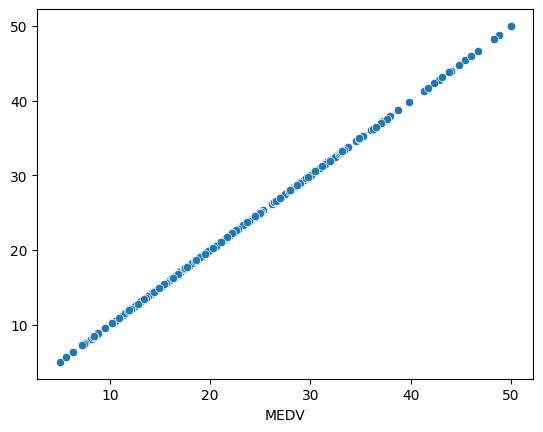

In [132]:
sns.scatterplot(x=y_train,y=y_pred_train)